In [ ]:
def print_label_dist(dataset):
    for split_name in dataset:
        print(split_name, ":")
        num_examples = 0
        for label in dataset[split_name].features["label"].names:
            count = dataset[split_name]["label"].count(
                dataset[split_name].features["label"].str2int(label)
            )
            print(" ", label, ":", count)
            num_examples += count
        print("  total :", num_examples)


print_label_dist(dataset)

train :
  correct : 2008
  contradictory : 1324
  incorrect : 499
  irrelevant : 1138
  total : 4969
test_ua :
  correct : 233
  contradictory : 113
  incorrect : 58
  irrelevant : 136
  total : 540
test_uq :
  correct : 301
  contradictory : 175
  incorrect : 64
  irrelevant : 193
  total : 733
test_ud :
  correct : 1917
  contradictory : 986
  incorrect : 417
  irrelevant : 1242
  total : 4562


In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv

load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)

dataset = load_dataset("nkazi/SciEntsBank")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "partially_correct_incomplete": 1,
        "contradictory": 2,
        "irrelevant": 3,
        "non_domain": 3,
    },
    "label",
)
dataset = dataset.cast_column(
    "label", ClassLabel(names=["correct", "contradictory", "incorrect", "irrelevant"])
)

# shuffle ds
ds = ds.shuffle(seed=42)

dataset["train"][0]

NameError: name 'ds' is not defined

In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv

load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)

dataset = load_dataset("nkazi/SciEntsBank")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "partially_correct_incomplete": 1,
        "contradictory": 2,
        "irrelevant": 3,
        "non_domain": 3,
    },
    "label",
)
dataset = dataset.cast_column(
    "label", ClassLabel(names=["correct", "contradictory", "incorrect", "irrelevant"])
)

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 1}

In [ ]:
def print_label_dist(dataset):
    for split_name in dataset:
        print(split_name, ":")
        num_examples = 0
        for label in dataset[split_name].features["label"].names:
            count = dataset[split_name]["label"].count(
                dataset[split_name].features["label"].str2int(label)
            )
            print(" ", label, ":", count)
            num_examples += count
        print("  total :", num_examples)


print_label_dist(dataset)

train :
  correct : 2008
  contradictory : 1324
  incorrect : 499
  irrelevant : 1138
  total : 4969
test_ua :
  correct : 233
  contradictory : 113
  incorrect : 58
  irrelevant : 136
  total : 540
test_uq :
  correct : 301
  contradictory : 175
  incorrect : 64
  irrelevant : 193
  total : 733
test_ud :
  correct : 1917
  contradictory : 986
  incorrect : 417
  irrelevant : 1242
  total : 4562


In [ ]:
def metric(gold, pred, trace=None):
    # gold is a DSPy Example with targets, pred is the model output
    gold_score = gold.label
    pred_score = pred.score

    return float(pred_score == gold_score)


evaluator = dspy.Evaluate(devset=dataset["train"], num_threads=8, display_progress=True)

teacher = dspy.Predict(TeacherFreeText4Way)

In [ ]:
def metric(gold, pred, trace=None):
    # gold is a DSPy Example with targets, pred is the model output
    gold_score = gold.label
    pred_score = pred.score

    return float(pred_score == gold_score)


evaluator = dspy.Evaluate(
    devset=dataset["train"][:20], num_threads=8, display_progress=True
)

teacher = dspy.Predict(TeacherFreeText4Way)

In [ ]:
evaluator(teacher, metric=metric, display_table=5)

2025/08/20 15:37:30 ERROR dspy.utils.parallelizer: Error for id: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.
2025/08/20 15:37:30 ERROR dspy.utils.parallelizer: Error for question: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.
2025/08/20 15:37:30 ERROR dspy.utils.parallelizer: Error for reference_answer: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.
2025/08/20 15:37:30 ERROR dspy.utils.parallelizer: Error for student_answer: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.
2025/08/20 15:37:30 ERROR dspy.utils.parallelizer: Error for label: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.


Average Metric: 0.00 / 0 (0%): 100%|██████████| 5/5 [00:00<00:00, 1959.41it/s]

2025/08/20 15:37:30 INFO dspy.evaluate.evaluate: Average Metric: 0.0 / 5 (0.0%)


AttributeError: 'str' object has no attribute 'items'

In [ ]:
def metric(gold, pred, trace=None):
    # gold is a DSPy Example with targets, pred is the model output
    gold_score = gold.label
    pred_score = pred.score

    return float(pred_score == gold_score)


evaluator = dspy.Evaluate(
    devset=dataset["train"][:20], num_threads=8, display_progress=True
)

teacher = dspy.Predict(TeacherFreeText4Way)

In [ ]:
evaluator(teacher, metric=metric, display_table=5)

2025/08/20 15:37:40 ERROR dspy.utils.parallelizer: Error for id: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.
2025/08/20 15:37:40 ERROR dspy.utils.parallelizer: Error for question: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.
2025/08/20 15:37:40 ERROR dspy.utils.parallelizer: Error for reference_answer: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.
2025/08/20 15:37:40 ERROR dspy.utils.parallelizer: Error for student_answer: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.


Average Metric: 0.00 / 0 (0%):   0%|          | 0/5 [00:00<?, ?it/s]

2025/08/20 15:37:40 ERROR dspy.utils.parallelizer: Error for label: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.


Average Metric: 0.00 / 0 (0%): 100%|██████████| 5/5 [00:00<00:00, 3011.85it/s]

2025/08/20 15:37:40 INFO dspy.evaluate.evaluate: Average Metric: 0.0 / 5 (0.0%)


AttributeError: 'str' object has no attribute 'items'

In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv

load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)

dataset = load_dataset("nkazi/SciEntsBank")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "partially_correct_incomplete": 1,
        "contradictory": 2,
        "irrelevant": 3,
        "non_domain": 3,
    },
    "label",
)
dataset = dataset.cast_column(
    "label", ClassLabel(names=["correct", "contradictory", "incorrect", "irrelevant"])
)

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 1}

In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv

load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)

dataset = load_dataset("nkazi/SciEntsBank", cache_dir="../data")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "partially_correct_incomplete": 1,
        "contradictory": 2,
        "irrelevant": 3,
        "non_domain": 3,
    },
    "label",
)
dataset = dataset.cast_column(
    "label", ClassLabel(names=["correct", "contradictory", "incorrect", "irrelevant"])
)

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

Casting the dataset: 100%|██████████| 4562/4562 [00:00<00:00, 899934.85 examples/s]


{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 1}

In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv

load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)

dataset = load_dataset("nkazi/SciEntsBank", cache_dir="../data")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "partially_correct_incomplete": 1,
        "contradictory": 2,
        "irrelevant": 3,
        "non_domain": 3,
    },
    "label",
)
dataset = dataset.cast_column(
    "label", ClassLabel(names=["correct", "contradictory", "incorrect", "irrelevant"])
)

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 1}

In [ ]:
class TeacherFreeText4Way(dspy.Signature):
    """You are a teacher for undergraduate students.
    Your job is to evaluate the student's answers to a short answer-question and provide short and concise feedback.

    Students have been asked this question:  {question}

    A correct answer to this question is: {correct_answer}

    Your task is to decide if the student’s answer is correct, partially correct but incomplete, irrelevant or contradictory.
    Answer based on the provided correct answer only.

    Correct: The student's answer is correct and includes the key points from the correct answer.
    If the student response is correct, you will respond with score = 0

    Partially correct but incomplete: The student's answer correct, but does not include the key points from the correct answer.
    If the student response is partially correct but incomplete, you will respond with score = 1

    Contradictory: The student's answer contradicts the correct answer. It is not related to the question.
    If the student response is contradictory, you will respond with score = 2

    Irrelevant: The student's answer is irrelevant to the question.
    If the student response is irrelevant, you will respond with score = 3

    The feedback should be short and concise, 1 to 2 sentences.
    The feedback should explain the reasoning behind the score, e.g. what is missing, what is wrong, what is right in the student's answer.
    The feedback should be based on the student's answer and the correct answer.
    """

    question: str = dspy.InputField(description="The question asked to the student.")

    reference_answer: str = dspy.InputField(
        description="The correct answer to the question."
    )

    student_answer: str = dspy.InputField(
        description="The student's answer to the question."
    )

    score: int = dspy.OutputField(
        description="0 if the content of the student's answer is correct, 1 if it is partially correct but incomplete, 2 if it is contradictory, 3 if it is irrelevant."
    )

    feedback: str = dspy.OutputField(
        description="Short and concise feedback for the student based on their answer."
    )

In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv

load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)

dataset = load_dataset("nkazi/SciEntsBank", cache_dir="../data")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "partially_correct_incomplete": 1,
        "contradictory": 2,
        "irrelevant": 3,
        "non_domain": 3,
    },
    "label",
)
dataset = dataset.cast_column(
    "label", ClassLabel(names=["correct", "contradictory", "incorrect", "irrelevant"])
)

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 1}

In [ ]:
class TeacherFreeText4Way(dspy.Signature):
    """You are a teacher for undergraduate students.
    Your job is to evaluate the student's answers to a short answer-question and provide short and concise feedback.

    Students have been asked this question:  {question}

    A correct answer to this question is: {correct_answer}

    Your task is to decide if the student’s answer is correct, partially correct but incomplete, irrelevant or contradictory.
    Answer based on the provided correct answer only.

    Correct: The student's answer is correct and includes the key points from the correct answer.
    If the student response is correct, you will respond with score = 0

    Partially correct but incomplete: The student's answer correct, but does not include the key points from the correct answer.
    If the student response is partially correct but incomplete, you will respond with score = 1

    Contradictory: The student's answer contradicts the correct answer. It is not related to the question.
    If the student response is contradictory, you will respond with score = 2

    Irrelevant: The student's answer is irrelevant to the question.
    If the student response is irrelevant, you will respond with score = 3

    The feedback should be short and concise, 1 to 2 sentences.
    The feedback should explain the reasoning behind the score, e.g. what is missing, what is wrong, what is right in the student's answer.
    The feedback should be based on the student's answer and the correct answer.
    """

    question: str = dspy.InputField(description="The question asked to the student.")

    reference_answer: str = dspy.InputField(
        description="The correct answer to the question."
    )

    student_answer: str = dspy.InputField(
        description="The student's answer to the question."
    )

    score: int = dspy.OutputField(
        description="0 if the content of the student's answer is correct, 1 if it is partially correct but incomplete, 2 if it is contradictory, 3 if it is irrelevant."
    )

    feedback: str = dspy.OutputField(
        description="Short and concise feedback for the student based on their answer."
    )

In [ ]:
def print_label_dist(dataset):
    for split_name in dataset:
        print(split_name, ":")
        num_examples = 0
        for label in dataset[split_name].features["label"].names:
            count = dataset[split_name]["label"].count(
                dataset[split_name].features["label"].str2int(label)
            )
            print(" ", label, ":", count)
            num_examples += count
        print("  total :", num_examples)


print_label_dist(dataset)

train :
  correct : 2008
  contradictory : 1324
  incorrect : 499
  irrelevant : 1138
  total : 4969
test_ua :
  correct : 233
  contradictory : 113
  incorrect : 58
  irrelevant : 136
  total : 540
test_uq :
  correct : 301
  contradictory : 175
  incorrect : 64
  irrelevant : 193
  total : 733
test_ud :
  correct : 1917
  contradictory : 986
  incorrect : 417
  irrelevant : 1242
  total : 4562


In [ ]:
def metric(gold, pred, trace=None):
    # gold is a DSPy Example with targets, pred is the model output
    gold_score = gold.label
    pred_score = pred.score

    return float(pred_score == gold_score)


evaluator = dspy.Evaluate(
    devset=dataset["train"][:20], num_threads=8, display_progress=True
)

teacher = dspy.Predict(TeacherFreeText4Way)

In [ ]:
evaluator(teacher, metric=metric, display_table=5)

2025/08/20 15:39:23 ERROR dspy.utils.parallelizer: Error for id: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.
2025/08/20 15:39:23 ERROR dspy.utils.parallelizer: Error for question: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.
2025/08/20 15:39:23 ERROR dspy.utils.parallelizer: Error for reference_answer: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.
2025/08/20 15:39:23 ERROR dspy.utils.parallelizer: Error for student_answer: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.


  0%|          | 0/5 [00:00<?, ?it/s]

2025/08/20 15:39:23 ERROR dspy.utils.parallelizer: Error for label: 'str' object has no attribute 'inputs'. Set `provide_traceback=True` for traceback.


Average Metric: 0.00 / 0 (0%): 100%|██████████| 5/5 [00:00<00:00, 2638.26it/s]

2025/08/20 15:39:23 INFO dspy.evaluate.evaluate: Average Metric: 0.0 / 5 (0.0%)


AttributeError: 'str' object has no attribute 'items'

In [ ]:
# evaluator(teacher, metric=metric, display_table=5)

scores = []

for example in dataset["train"][:20]:
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))

print(f"Average score: {sum(scores) / len(scores)}")

TypeError: string indices must be integers, not 'str'

In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv
from tqdm import tqdm

load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)

dataset = load_dataset("nkazi/SciEntsBank", cache_dir="../data")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "partially_correct_incomplete": 1,
        "contradictory": 2,
        "irrelevant": 3,
        "non_domain": 3,
    },
    "label",
)
dataset = dataset.cast_column(
    "label", ClassLabel(names=["correct", "contradictory", "incorrect", "irrelevant"])
)

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 1}

In [ ]:
# evaluator(teacher, metric=metric, display_table=5)

scores = []

for example in tqdm(dataset["train"][:20]):
    print(example)
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))

print(f"Average score: {sum(scores) / len(scores)}")

  0%|          | 0/5 [00:00<?, ?it/s]

id


TypeError: string indices must be integers, not 'str'

In [ ]:
# evaluator(teacher, metric=metric, display_table=5)

scores = []

for example in tqdm(dataset["train"]):
    print(example)
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))

print(f"Average score: {sum(scores) / len(scores)}")

  0%|          | 0/4969 [00:00<?, ?it/s]

{'id': 'ME.79.207.1', 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.", 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.', 'student_answer': 'The magnet sends magnet through one paperclip to another.', 'label': 1}


ValueError: No LM is loaded. Please configure the LM using `dspy.configure(lm=dspy.LM(...))`. e.g, `dspy.configure(lm=dspy.LM('openai/gpt-4o-mini'))`

In [ ]:
# evaluator(teacher, metric=metric, display_table=5)
teacher = dspy.Predict(TeacherFreeText4Way)
scores = []

for example in tqdm(dataset["train"]):
    # print(example)
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))

print(f"Average score: {sum(scores) / len(scores)}")

  0%|          | 0/4969 [00:00<?, ?it/s]


ValueError: No LM is loaded. Please configure the LM using `dspy.configure(lm=dspy.LM(...))`. e.g, `dspy.configure(lm=dspy.LM('openai/gpt-4o-mini'))`

In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv
from tqdm import tqdm

load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)

dataset = load_dataset("nkazi/SciEntsBank", cache_dir="../data")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "partially_correct_incomplete": 1,
        "contradictory": 2,
        "irrelevant": 3,
        "non_domain": 3,
    },
    "label",
)
dataset = dataset.cast_column(
    "label", ClassLabel(names=["correct", "contradictory", "incorrect", "irrelevant"])
)

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 1}

In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv
from tqdm import tqdm

load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)
dspy.configure(lm=lm)

dataset = load_dataset("nkazi/SciEntsBank", cache_dir="../data")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "partially_correct_incomplete": 1,
        "contradictory": 2,
        "irrelevant": 3,
        "non_domain": 3,
    },
    "label",
)
dataset = dataset.cast_column(
    "label", ClassLabel(names=["correct", "contradictory", "incorrect", "irrelevant"])
)

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 1}

In [ ]:
# evaluator(teacher, metric=metric, display_table=5)
teacher = dspy.Predict(TeacherFreeText4Way)
scores = []

for example in tqdm(dataset["train"]):
    # print(example)
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))

print(f"Average score: {sum(scores) / len(scores)}")

  0%|          | 5/4969 [00:05<1:30:56,  1.10s/it]


KeyboardInterrupt: 

In [ ]:
# evaluator(teacher, metric=metric, display_table=5)
teacher = dspy.Predict(TeacherFreeText4Way)
scores = []

for example in tqdm(dataset["train"]):
    # print(example)
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))
    if len(scores) > 10:
        break

print(f"Average score: {sum(scores) / len(scores)}")

  0%|          | 10/4969 [00:03<32:30,  2.54it/s]

Average score: 0.45454545454545453


In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv
from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, accuracy_score

load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)
dspy.configure(lm=lm)

dataset = load_dataset("nkazi/SciEntsBank", cache_dir="../data")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "partially_correct_incomplete": 1,
        "contradictory": 2,
        "irrelevant": 3,
        "non_domain": 3,
    },
    "label",
)
dataset = dataset.cast_column(
    "label", ClassLabel(names=["correct", "contradictory", "incorrect", "irrelevant"])
)

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 1}

In [ ]:
# evaluator(teacher, metric=metric, display_table=5)


teacher = dspy.Predict(TeacherFreeText4Way)
scores = []
y_true = []
y_pred = []

for example in tqdm(dataset["train"]):
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))
    y_true.append(gold_score)
    y_pred.append(pred_score)
    if len(scores) > 20:
        break

print(f"Average score: {sum(scores) / len(scores)}")
print(f"Correct: {sum(scores)} out of {len(scores)}")

# Calculate and print F1, precision, and accuracy
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1 (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

  0%|          | 20/4969 [00:09<37:46,  2.18it/s]

Average score: 0.42857142857142855
Correct: 9.0 out of 21
Accuracy: 0.4286
Precision (macro): 0.5667
F1 (macro): 0.4719


In [ ]:
# evaluator(teacher, metric=metric, display_table=5)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

teacher = dspy.Predict(TeacherFreeText4Way)
scores = []
y_true = []
y_pred = []

for example in tqdm(dataset["train"]):
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))
    y_true.append(gold_score)
    y_pred.append(pred_score)
    if len(scores) > 20:
        break

print(f"Average score: {sum(scores) / len(scores)}")
print(f"Correct: {sum(scores)} out of {len(scores)}")

# Calculate and print F1, precision, and accuracy
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1 (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

# Plot confusion matrix
labels = dataset["train"].features["label"].names
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# evaluator(teacher, metric=metric, display_table=5)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

teacher = dspy.Predict(TeacherFreeText4Way)
scores = []
y_true = []
y_pred = []

for example in tqdm(dataset["train"]):
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))
    y_true.append(gold_score)
    y_pred.append(pred_score)
    if len(scores) > 20:
        break

print(f"Average score: {sum(scores) / len(scores)}")
print(f"Correct: {sum(scores)} out of {len(scores)}")

# Calculate and print F1, precision, and accuracy
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1 (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

# Plot confusion matrix
labels = dataset["train"].features["label"].names
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

ModuleNotFoundError: No module named 'seaborn'

  0%|          | 20/4969 [00:00<01:12, 68.25it/s]


Average score: 0.42857142857142855
Correct: 9.0 out of 21
Accuracy: 0.4286
Precision (macro): 0.5667
F1 (macro): 0.4719


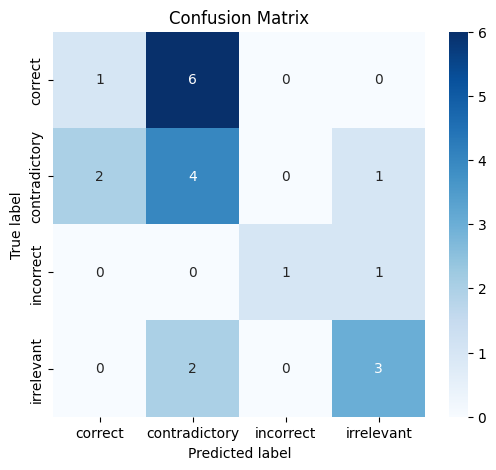

In [ ]:
# evaluator(teacher, metric=metric, display_table=5)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

teacher = dspy.Predict(TeacherFreeText4Way)
scores = []
y_true = []
y_pred = []

for example in tqdm(dataset["train"]):
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))
    y_true.append(gold_score)
    y_pred.append(pred_score)
    if len(scores) > 20:
        break

print(f"Average score: {sum(scores) / len(scores)}")
print(f"Correct: {sum(scores)} out of {len(scores)}")

# Calculate and print F1, precision, and accuracy
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1 (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

# Plot confusion matrix
labels = dataset["train"].features["label"].names
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv
from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, accuracy_score

load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)
dspy.configure(lm=lm)

dataset = load_dataset("nkazi/SciEntsBank", cache_dir="../data")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "partially_correct_incomplete": 1,
        "contradictory": 2,
        "irrelevant": 3,
        "non_domain": 3,
    },
    "label",
)
dataset = dataset.cast_column(
    "label", ClassLabel(names=["correct", "contradictory", "incorrect", "irrelevant"])
)

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 1}

In [ ]:
class TeacherFreeText4Way(dspy.Signature):
    """You are a teacher for undergraduate students.
    Your job is to evaluate the student's answers to a short answer-question.

    Students have been asked this question:  {question}

    A correct answer to this question is: {reference_answer}

    Your task is to decide if the student’s answer is correct, partially correct but incomplete, irrelevant or contradictory.
    Answer based on the provided correct answer only.

    Correct: The student's answer is correct and includes the key points from the correct answer.
    If the student response is correct, you will respond with score = 0

    Partially correct but incomplete: The student's answer correct, but does not include the key points from the correct answer.
    If the student response is partially correct but incomplete, you will respond with score = 1

    Contradictory: The student's answer contradicts the correct answer. It is not related to the question.
    If the student response is contradictory, you will respond with score = 2

    Irrelevant: The student's answer is irrelevant to the question.
    If the student response is irrelevant, you will respond with score = 3
    """

    question: str = dspy.InputField(description="The question asked to the student.")

    reference_answer: str = dspy.InputField(
        description="The correct answer to the question."
    )

    student_answer: str = dspy.InputField(
        description="The student's answer to the question."
    )

    score: int = dspy.OutputField(
        description="0 if the content of the student's answer is correct, 1 if it is partially correct but incomplete, 2 if it is contradictory, 3 if it is irrelevant."
    )

In [ ]:
def print_label_dist(dataset):
    for split_name in dataset:
        print(split_name, ":")
        num_examples = 0
        for label in dataset[split_name].features["label"].names:
            count = dataset[split_name]["label"].count(
                dataset[split_name].features["label"].str2int(label)
            )
            print(" ", label, ":", count)
            num_examples += count
        print("  total :", num_examples)


# print_label_dist(dataset)

In [ ]:
def metric(gold, pred, trace=None):
    # gold is a DSPy Example with targets, pred is the model output
    gold_score = gold.label
    pred_score = pred.score

    return float(pred_score == gold_score)


evaluator = dspy.Evaluate(
    devset=dataset["train"][:20], num_threads=8, display_progress=True
)

  0%|          | 20/4969 [00:08<34:37,  2.38it/s] 

Average score: 0.5238095238095238
Correct: 11.0 out of 21
Accuracy: 0.5238
Precision (macro): 0.6375
F1 (macro): 0.5482


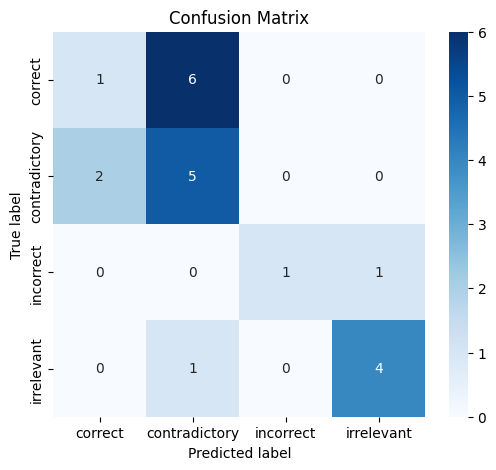

In [ ]:
# evaluator(teacher, metric=metric, display_table=5)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

teacher = dspy.Predict(TeacherFreeText4Way)
scores = []
y_true = []
y_pred = []

for example in tqdm(dataset["train"]):
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))
    y_true.append(gold_score)
    y_pred.append(pred_score)
    if len(scores) > 20:
        break

print(f"Average score: {sum(scores) / len(scores)}")
print(f"Correct: {sum(scores)} out of {len(scores)}")

# Calculate and print F1, precision, and accuracy
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1 (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

# Plot confusion matrix
labels = dataset["train"].features["label"].names
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv
from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)
dspy.configure(lm=lm)

dataset = load_dataset("nkazi/SciEntsBank", cache_dir="../data")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "partially_correct_incomplete": 1,
        "contradictory": 2,
        "irrelevant": 3,
        "non_domain": 3,
    },
    "label",
)
dataset = dataset.cast_column(
    "label", ClassLabel(names=["correct", "contradictory", "incorrect", "irrelevant"])
)

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 1}

  2%|▏         | 99/4969 [00:30<24:52,  3.26it/s]

Average score: 0.51
Correct: 51.0 out of 100
Accuracy: 0.5100
Precision (macro): 0.6016
F1 (macro): 0.5493


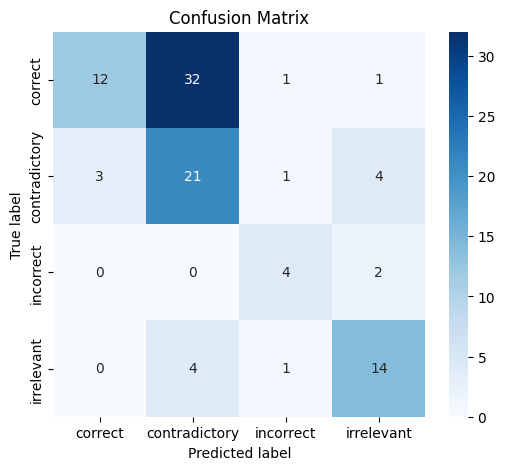

In [ ]:
teacher = dspy.Predict(TeacherFreeText4Way)
scores = []
y_true = []
y_pred = []

number_of_examples = 100

for example in tqdm(dataset["train"]):
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))
    y_true.append(gold_score)
    y_pred.append(pred_score)
    if len(scores) >= number_of_examples:
        break

print(f"Average score: {sum(scores) / len(scores)}")
print(f"Correct: {sum(scores)} out of {len(scores)}")

# Calculate and print F1, precision, and accuracy
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1 (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

# Plot confusion matrix
labels = dataset["train"].features["label"].names
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

  2%|▏         | 99/4969 [01:48<1:29:06,  1.10s/it]

Average score: 0.42
Correct: 42.0 out of 100
Accuracy: 0.4200
Precision (macro): 0.6618
F1 (macro): 0.4563


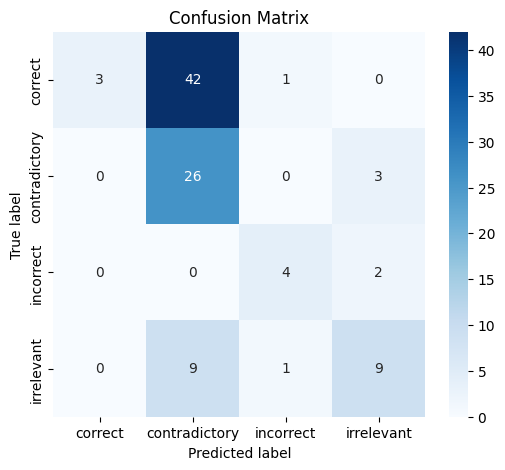

In [ ]:
teacher = dspy.ChainOfThought(TeacherFreeText4Way)
scores = []
y_true = []
y_pred = []

number_of_examples = 100

for example in tqdm(dataset["train"]):
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))
    y_true.append(gold_score)
    y_pred.append(pred_score)
    if len(scores) >= number_of_examples:
        break

print(f"Average score: {sum(scores) / len(scores)}")
print(f"Correct: {sum(scores)} out of {len(scores)}")

# Calculate and print F1, precision, and accuracy
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1 (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

# Plot confusion matrix
labels = dataset["train"].features["label"].names
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv
from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)
dspy.configure(lm=lm)

dataset = load_dataset("nkazi/SciEntsBank", cache_dir="../data")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 3,
        "partially_correct_incomplete": 2,
        "contradictory": 0,
        "irrelevant": 1,
        "non_domain": 1,
    },
    "label",
)
dataset = dataset.cast_column(
    "label",
    ClassLabel(
        names=["correct", "partially_correct_incomplete", "contradictory", "irrelevant"]
    ),
)

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

Casting the dataset: 100%|██████████| 4562/4562 [00:00<00:00, 1015681.03 examples/s]


{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 2}

In [ ]:
class TeacherFreeText4Way(dspy.Signature):
    """You are a teacher for undergraduate students.
    Your job is to evaluate the student's answers to a short answer-question.

    Students have been asked this question:  {question}

    A correct answer to this question is: {reference_answer}

    Your task is to decide if the student’s answer is correct, partially correct but incomplete, irrelevant or contradictory.
    Answer based on the provided correct answer only.

    Correct: The student's answer is correct and includes the key points from the correct answer.
    If the student response is correct, you will respond with score = 3

    Partially correct but incomplete: The student's answer correct, but does not include the key points from the correct answer.
    If the student response is partially correct but incomplete, you will respond with score = 2

    Contradictory: The student's answer contradicts the correct answer. It is not related to the question.
    If the student response is contradictory, you will respond with score = 0

    Irrelevant: The student's answer is irrelevant to the question.
    If the student response is irrelevant, you will respond with score = 1
    """

    question: str = dspy.InputField(description="The question asked to the student.")

    reference_answer: str = dspy.InputField(
        description="The correct answer to the question."
    )

    student_answer: str = dspy.InputField(
        description="The student's answer to the question."
    )

    score: int = dspy.OutputField(
        description="3 if the content of the student's answer is correct, 2 if it is partially correct but incomplete, 0 if it is contradictory, 1 if it is irrelevant."
    )

  2%|▏         | 99/4969 [00:40<33:31,  2.42it/s]  

Average score: 0.47
Correct: 47.0 out of 100
Accuracy: 0.4700
Precision (macro): 0.5067
F1 (macro): 0.4814


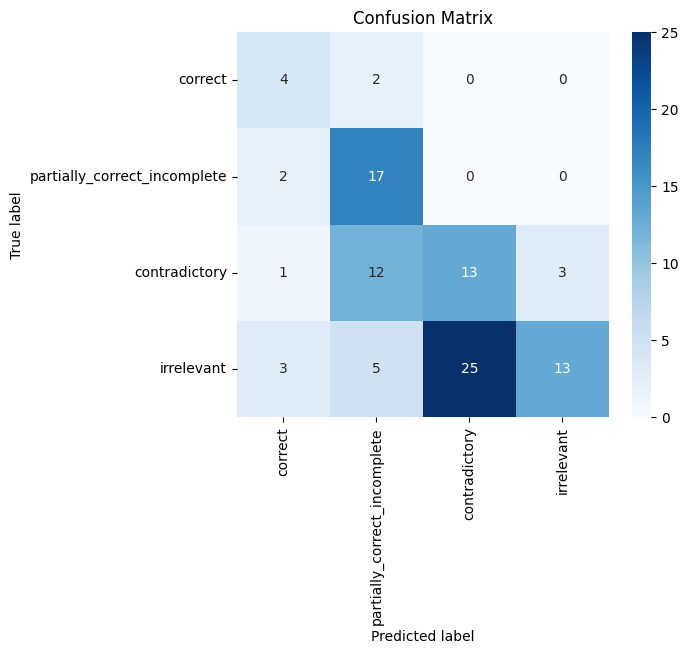

In [ ]:
teacher = dspy.Predict(TeacherFreeText4Way)
scores = []
y_true = []
y_pred = []

number_of_examples = 100

for example in tqdm(dataset["train"]):
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))
    y_true.append(gold_score)
    y_pred.append(pred_score)
    if len(scores) >= number_of_examples:
        break

print(f"Average score: {sum(scores) / len(scores)}")
print(f"Correct: {sum(scores)} out of {len(scores)}")

# Calculate and print F1, precision, and accuracy
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1 (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

# Plot confusion matrix
labels = dataset["train"].features["label"].names
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv
from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)
dspy.configure(lm=lm)

dataset = load_dataset("nkazi/SciEntsBank", cache_dir="../data")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "contradictory": 1,
        "partially_correct_incomplete": 2,
        "irrelevant": 2,
        "non_domain": 2,
    },
    "label",
)
dataset = dataset.cast_column(
    "label", ClassLabel(names=["correct", "contradictory", "incorrect"])
)

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

Casting the dataset: 100%|██████████| 4562/4562 [00:00<00:00, 1030172.01 examples/s]


{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 2}

In [ ]:
class TeacherFreeText4Way(dspy.Signature):
    """You are a teacher for undergraduate students.
    Your job is to evaluate the student's answers to a short answer-question.

    Your task is to decide if the student’s answer is correct, partially correct but incomplete, irrelevant or contradictory.
    Answer based on the provided correct answer only.

    Correct: The student's answer is correct and includes the key points from the correct answer.
    If the student response is correct, you will respond with score = 0

    Contradictory: The student's answer contradicts the correct answer. It is not related to the question.
    If the student response is contradictory, you will respond with score = 1

    Partially correct but incomplete: The student's answer correct, but does not include the key points from the correct answer.
    Or if the student's answer is irrelevant to the question.
    If the student response is partially correct but incomplete, you will respond with score = 2
    """

    # Irrelevant: The student's answer is irrelevant to the question.
    # If the student response is irrelevant, you will respond with score = 3

    question: str = dspy.InputField(description="The question asked to the student.")

    reference_answer: str = dspy.InputField(
        description="The correct answer to the question."
    )

    student_answer: str = dspy.InputField(
        description="The student's answer to the question."
    )

    score: int = dspy.OutputField(
        description="0 if the content of the student's answer is correct, 1 if it is contradictory, 2 if it is partially correct but incomplete or irrelevant."
    )

    # score: int = dspy.OutputField(
    #     description="3 if the content of the student's answer is correct, 2 if it is partially correct but incomplete, 0 if it is contradictory, 1 if it is irrelevant."
    # )

  2%|▏         | 99/4969 [00:41<34:19,  2.36it/s]

Average score: 0.57
Correct: 57.0 out of 100
Accuracy: 0.5700
Precision (macro): 0.5675
F1 (macro): 0.5388


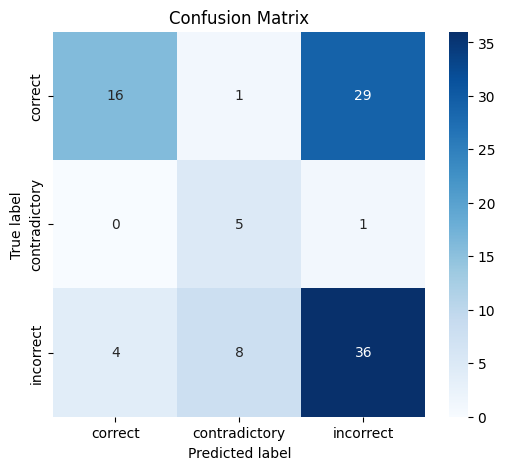

In [ ]:
teacher = dspy.Predict(TeacherFreeText4Way)
scores = []
y_true = []
y_pred = []

number_of_examples = 100

for example in tqdm(dataset["train"]):
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))
    y_true.append(gold_score)
    y_pred.append(pred_score)
    if len(scores) >= number_of_examples:
        break

print(f"Average score: {sum(scores) / len(scores)}")
print(f"Correct: {sum(scores)} out of {len(scores)}")

# Calculate and print F1, precision, and accuracy
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1 (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

# Plot confusion matrix
labels = dataset["train"].features["label"].names
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
class TeacherFreeText4Way(dspy.Signature):
    """You are a teacher for undergraduate students.
    Your job is to evaluate the student's answers to a short answer-question.

    Your task is to decide if the student’s answer is correct, partially correct but incomplete, irrelevant or contradictory.
    Answer based on the provided correct answer only.

    Correct: The student's answer is correct and includes the key points from the correct answer.
    If the student response is correct, you will respond with score = 0

    Contradictory: The student's answer directly contradicts the correct answer.
    If the student response is contradictory, you will respond with score = 1

    Incorrect: The student's answer is incorrect, for example it is not related to the question or it is not correct, but does not contradict the correct answer.
    If the student response is incorrect, you will respond with score = 2
    """

    # Irrelevant: The student's answer is irrelevant to the question.
    # If the student response is irrelevant, you will respond with score = 3

    question: str = dspy.InputField(description="The question asked to the student.")

    reference_answer: str = dspy.InputField(
        description="The correct answer to the question."
    )

    student_answer: str = dspy.InputField(
        description="The student's answer to the question."
    )

    score: int = dspy.OutputField(
        description="0 if the content of the student's answer is correct, 1 if it is contradictory, 2 if it is incorrect."
    )

    # score: int = dspy.OutputField(
    #     description="3 if the content of the student's answer is correct, 2 if it is partially correct but incomplete, 0 if it is contradictory, 1 if it is irrelevant."
    # )

  2%|▏         | 99/4969 [00:41<34:15,  2.37it/s]

Average score: 0.7
Correct: 70.0 out of 100
Accuracy: 0.7000
Precision (macro): 0.6997
F1 (macro): 0.6874


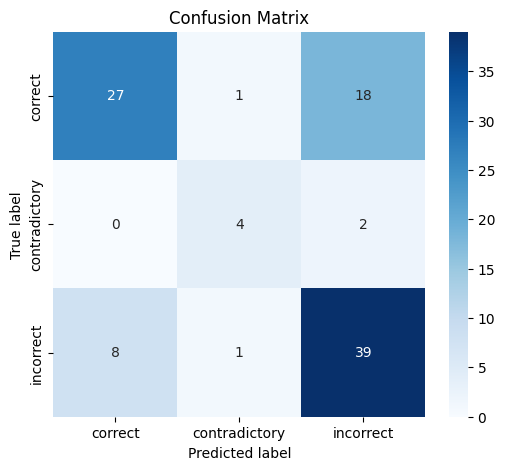

In [ ]:
teacher = dspy.Predict(TeacherFreeText4Way)
scores = []
y_true = []
y_pred = []

number_of_examples = 100

for example in tqdm(dataset["train"]):
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))
    y_true.append(gold_score)
    y_pred.append(pred_score)
    if len(scores) >= number_of_examples:
        break

print(f"Average score: {sum(scores) / len(scores)}")
print(f"Correct: {sum(scores)} out of {len(scores)}")

# Calculate and print F1, precision, and accuracy
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1 (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

# Plot confusion matrix
labels = dataset["train"].features["label"].names
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv
from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o-mini",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)
dspy.configure(lm=lm)

dataset = load_dataset("nkazi/SciEntsBank", cache_dir="../data")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "contradictory": 1,
        "partially_correct_incomplete": 1,
        "irrelevant": 1,
        "non_domain": 1,
    },
    "label",
)
dataset = dataset.cast_column("label", ClassLabel(names=["correct", "incorrect"]))

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

Casting the dataset: 100%|██████████| 4562/4562 [00:00<00:00, 785678.53 examples/s]


{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 1}

In [ ]:
class TeacherFreeText3Way(dspy.Signature):
    """You are a teacher for undergraduate students.
    Your job is to evaluate the student's answers to a short answer-question.

    Your task is to decide if the student’s answer is correct, partially correct but incomplete, irrelevant or contradictory.
    Answer based on the provided correct answer only.

    Correct: The student's answer is correct and includes the key points from the correct answer.
    If the student response is correct, you will respond with score = 0

    Contradictory: The student's answer directly contradicts the correct answer.
    If the student response is contradictory, you will respond with score = 1

    Incorrect: The student's answer is incorrect, for example it is not related to the question or it is not correct, but does not contradict the correct answer.
    If the student response is incorrect, you will respond with score = 2
    """

    # Irrelevant: The student's answer is irrelevant to the question.
    # If the student response is irrelevant, you will respond with score = 3

    question: str = dspy.InputField(description="The question asked to the student.")

    reference_answer: str = dspy.InputField(
        description="The correct answer to the question."
    )

    student_answer: str = dspy.InputField(
        description="The student's answer to the question."
    )

    score: int = dspy.OutputField(
        description="0 if the content of the student's answer is correct, 1 if it is contradictory, 2 if it is incorrect."
    )

    # score: int = dspy.OutputField(
    #     description="3 if the content of the student's answer is correct, 2 if it is partially correct but incomplete, 0 if it is contradictory, 1 if it is irrelevant."
    # )


class TeacherFreeText2Way(dspy.Signature):
    """You are a teacher for undergraduate students.
    Your job is to evaluate the student's answers to a short answer-question.

    Your task is to decide if the student’s answer is correct or incorrect.
    Answer based on the provided correct answer.

    Correct: The student's answer is correct and matches the correct answer.
    If the student response is correct, you will respond with score = 0

    Incorrect: The student's answer is incorrect, for example it is not related to the question or it is not correct,
    or if it contradict the correct answer.
    If the student response is incorrect, you will respond with score = 1
    """

    question: str = dspy.InputField(description="The question asked to the student.")

    reference_answer: str = dspy.InputField(
        description="The correct answer to the question."
    )

    student_answer: str = dspy.InputField(
        description="The student's answer to the question."
    )

    score: int = dspy.OutputField(
        description="0 if the content of the student's answer is correct, 1 if it is incorrect."
    )

  2%|▏         | 99/4969 [01:35<1:18:09,  1.04it/s]

Average score: 0.69
Correct: 69.0 out of 100
Accuracy: 0.6900
Precision (macro): 0.7177
F1 (macro): 0.6656


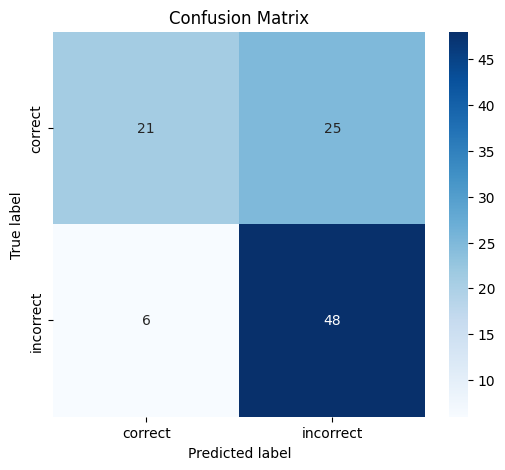

In [ ]:
teacher = dspy.Predict(TeacherFreeText2Way)
scores = []
y_true = []
y_pred = []

number_of_examples = 100

for example in tqdm(dataset["train"]):
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))
    y_true.append(gold_score)
    y_pred.append(pred_score)
    if len(scores) >= number_of_examples:
        break

print(f"Average score: {sum(scores) / len(scores)}")
print(f"Correct: {sum(scores)} out of {len(scores)}")

# Calculate and print F1, precision, and accuracy
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1 (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

# Plot confusion matrix
labels = dataset["train"].features["label"].names
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from datasets import load_dataset
from datasets import ClassLabel
import dspy
import os
from dotenv import load_dotenv
from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


load_dotenv()


azure_api_key = os.getenv("AZURE_API_KEY")
azure_api_base = os.getenv("AZURE_API_BASE")

lm = dspy.LM(
    "azure/gpt-4o",
    api_base=azure_api_base,
    api_key=azure_api_key,
    api_version="2024-12-01-preview",
)
dspy.configure(lm=lm)

dataset = load_dataset("nkazi/SciEntsBank", cache_dir="../data")

# convert to 4 way classification
dataset = dataset.align_labels_with_mapping(
    {
        "correct": 0,
        "contradictory": 1,
        "partially_correct_incomplete": 1,
        "irrelevant": 1,
        "non_domain": 1,
    },
    "label",
)
dataset = dataset.cast_column("label", ClassLabel(names=["correct", "incorrect"]))

# shuffle ds
dataset = dataset.shuffle(seed=42)

dataset["train"][0]

{'id': 'ME.79.207.1',
 'question': "Kurt was investigating which objects stick to magnets. He made an entry in his science notebook and drew a picture to help explain what he did. Look what I did! I picked up a paperclip with a magnet. Then that paperclip picked up another one, and then another one. And they weren't hooked together either. All they had to do was touch each other. Explain to Kurt why he was able to pick up all those paperclips, even though the magnet was only touching the first one.",
 'reference_answer': 'When a paperclip sticks to a magnet, the paperclip turns into a temporary magnet, so the paperclip can stick to other paperclips and other things made of iron.',
 'student_answer': 'The magnet sends magnet through one paperclip to another.',
 'label': 1}

  2%|▏         | 99/4969 [00:33<27:10,  2.99it/s]

Average score: 0.74
Correct: 74.0 out of 100
Accuracy: 0.7400
Precision (macro): 0.7386
F1 (macro): 0.7374


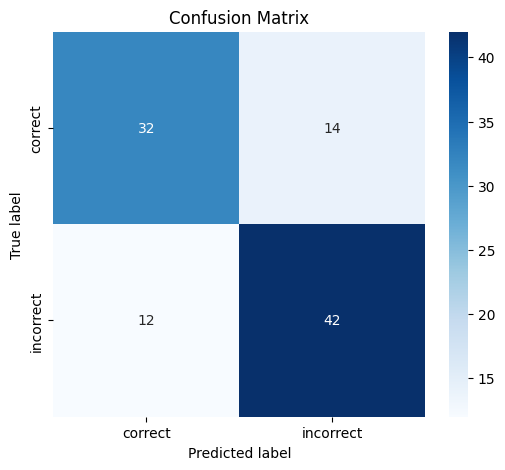

In [ ]:
teacher = dspy.Predict(TeacherFreeText2Way)
scores = []
y_true = []
y_pred = []

number_of_examples = 100

for example in tqdm(dataset["train"]):
    pred = teacher(
        question=example["question"],
        reference_answer=example["reference_answer"],
        student_answer=example["student_answer"],
    )
    gold_score = example["label"]
    pred_score = pred.score
    scores.append(float(pred_score == gold_score))
    y_true.append(gold_score)
    y_pred.append(pred_score)
    if len(scores) >= number_of_examples:
        break

print(f"Average score: {sum(scores) / len(scores)}")
print(f"Correct: {sum(scores)} out of {len(scores)}")

# Calculate and print F1, precision, and accuracy
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"F1 (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

# Plot confusion matrix
labels = dataset["train"].features["label"].names
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()